In [124]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Retail_Customer.csv")  # Assuming the dataset file is named "Retail_Customer.csv"

# Convert 'Visit_Date' column to datetime type
data['Visit_Date'] = pd.to_datetime(data['Visit_Date'])

# Add a 'Day' column by extracting the day of the week
data['Day'] = data['Visit_Date'].dt.day_name()

# Define the week boundaries based on the provided rules
week_boundaries = {
    'W1': pd.date_range(start='2014-10-13', end='2014-10-19', freq='D'),
    'W2': pd.date_range(start='2014-10-06', end='2014-10-12', freq='D'),
    'W3': pd.date_range(start='2014-09-29', end='2014-10-05', freq='D'),
    'W4': pd.date_range(start='2014-09-22', end='2014-09-28', freq='D'),
    'W5': pd.date_range(start='2014-09-18', end='2014-09-21', freq='D')
}

# Function to assign week based on visit date
def assign_week(visit_date):
    for week, dates in week_boundaries.items():
        if visit_date in dates:
            return week
    return None

# Create 'Week' column
data['Week'] = data['Visit_Date'].apply(assign_week)

# Drop rows where 'Week' is None (outside defined weeks)
data.dropna(subset=['Week'], inplace=True)

# Print the first few rows to check the 'Week' column
print(data.head())




      Visit_Date  CustomerID  Total_Purchases_In_USD       Day Week
25414 2014-09-18   825198306                   171.2  Thursday   W5
25415 2014-09-18  1098948004                   171.2  Thursday   W5
25416 2014-09-18    68591668                   171.2  Thursday   W5
25417 2014-09-18  1090156718                   256.8  Thursday   W5
25418 2014-09-18    37053820                    85.6  Thursday   W5


In [125]:
# Group by 'CustomerID'
grouped = data.groupby('CustomerID')

# Total_Amount_Spent
total_amount_spent = grouped['Total_Purchases_In_USD'].sum()

new_data = pd.DataFrame({
    'Total_Amount_Spent': total_amount_spent
})

new_data.head()


,Total_Amount_Spent
CustomerID,
488,171.20
5194,599.20
5398,102.72
6930,599.20
7260,1968.80


In [126]:
import pandas as pd

# Load the dataset
#data = pd.read_csv("Retail_Customer.csv")  # Assuming the dataset file is named "Retail_Customer.csv"

# Convert 'Visit_Date' column to datetime type
#data['Visit_Date'] = pd.to_datetime(data['Visit_Date'])

# Add a 'Day_of_Week' column by extracting the day of the week
#data['Day_of_Week'] = data['Visit_Date'].dt.day_name()

# Define the week boundaries based on the provided rules
#week_boundaries = {
#    'W1': pd.date_range(start='2014-10-13', end='2014-10-19', freq='D'),
 #   'W2': pd.date_range(start='2014-10-06', end='2014-10-12', freq='D'),
  #  'W3': pd.date_range(start='2014-09-29', end='2014-10-05', freq='D'),
   # 'W4': pd.date_range(start='2014-09-22', end='2014-09-28', freq='D'),
    #'W5': pd.date_range(start='2014-09-18', end='2014-09-21', freq='D')
#}

# Function to assign week based on visit date
#def assign_week(visit_date):
 #   for week, dates in week_boundaries.items():
  #      if visit_date in dates:
   #         return week
   #  return None

# Create 'Week' column
# data['Week'] = data['Visit_Date'].apply(assign_week)

# Drop rows where 'Week' is None (outside defined weeks)
#data.dropna(subset=['Week'], inplace=True)

# Group by 'CustomerID'
grouped = data.groupby('CustomerID')

# Calculate various metrics for each customer
metrics = {
    'W1_Total_Sales': grouped['Total_Purchases_In_USD'].sum(),
    'W1_Visit_Days': grouped['Visit_Date'].nunique(),
    'W2_Total_Sales': grouped['Total_Purchases_In_USD'].sum(),
    'W2_Visit_Days': grouped['Visit_Date'].nunique(),
    'W3_Total_Sales': grouped['Total_Purchases_In_USD'].sum(),
    'W3_Visit_Days': grouped['Visit_Date'].nunique(),
    'W4_Total_Sales': grouped['Total_Purchases_In_USD'].sum(),
    'W4_Visit_Days': grouped['Visit_Date'].nunique(),
    'W5_Total_Sales': grouped['Total_Purchases_In_USD'].sum(),
    'W5_Visit_Days': grouped['Visit_Date'].nunique(),


    # Add more metrics for other weeks and days here
}

# Combine metrics into a single DataFrame
customer_metrics = pd.DataFrame(metrics)

# Print the first few rows of the DataFrame
print(customer_metrics.head())


            W1_Total_Sales  W1_Visit_Days  W2_Total_Sales  W2_Visit_Days  \
CustomerID                                                                 
488                 171.20              1          171.20              1   
5194                599.20              1          599.20              1   
5398                102.72              2          102.72              2   
6930                599.20              6          599.20              6   
7260               1968.80             14         1968.80             14   

            W3_Total_Sales  W3_Visit_Days  W4_Total_Sales  W4_Visit_Days  \
CustomerID                                                                 
488                 171.20              1          171.20              1   
5194                599.20              1          599.20              1   
5398                102.72              2          102.72              2   
6930                599.20              6          599.20              6   
7260       

In [127]:
# FASTER EXECUTION

import pandas as pd

# Load the dataset
# data = pd.read_csv("Retail_Customer.csv")  # Assuming the dataset file is named "Retail_Customer.csv"

# Group by 'CustomerID'
grouped = data.groupby('CustomerID')

# Define a function to calculate the number of visits and total purchases for each day of the week
def calculate_metrics(day):
    day_data = data[data['Day'] == day]
    visit_days = day_data.groupby('CustomerID').size()
    total_sales = day_data.groupby('CustomerID')['Total_Purchases_In_USD'].sum()
    return visit_days, total_sales

# Calculate metrics for each day of the week
days = ['Friday', 'Thursday', 'Tuesday', 'Saturday', 'Wednesday', 'Sunday', 'Monday']
metrics = {}
for day in days:
    visit_days, total_sales = calculate_metrics(day)
    metrics[f'{day}_Visit_Days'] = visit_days
    metrics[f'{day}_Total_Sales'] = total_sales



# Combine the results into a DataFrame
daily_metrics = pd.DataFrame(metrics)

# Fill NaN values with zeros
daily_metrics.fillna(0, inplace=True)

# Print the first few rows of the DataFrame
print(daily_metrics.head())


            Friday_Visit_Days  Friday_Total_Sales  Thursday_Visit_Days  \
CustomerID                                                               
488                       1.0              171.20                  0.0   
5194                      0.0                0.00                  1.0   
5398                      0.0                0.00                  0.0   
6930                      1.0               85.60                  1.0   
7260                      5.0              736.16                  2.0   

            Thursday_Total_Sales  Tuesday_Visit_Days  Tuesday_Total_Sales  \
CustomerID                                                                  
488                         0.00                 0.0                 0.00   
5194                      599.20                 0.0                 0.00   
5398                        0.00                 2.0               102.72   
6930                       85.60                 2.0               256.80   
7260               

In [128]:
import pandas as pd

# Group by 'CustomerID'
grouped = data.groupby('CustomerID')

# Define a function to calculate the favorite visit day revenue-wise and visit-wise
def calculate_favorite_day():
    # Calculate total purchases for each day for each customer
    daily_purchases = data.groupby(['CustomerID', 'Day'])['Total_Purchases_In_USD'].sum().reset_index()

    # Find the day with maximum total purchases for each customer
    favorite_day_revenue = daily_purchases.loc[daily_purchases.groupby('CustomerID')['Total_Purchases_In_USD'].idxmax(), ['CustomerID', 'Day']]

    # Calculate visit count for each day for each customer
    daily_visits = data.groupby(['CustomerID', 'Day']).size().reset_index(name='Visit_Count')

    # Find the day with maximum visits for each customer
    favorite_day_visits = daily_visits.loc[daily_visits.groupby('CustomerID')['Visit_Count'].idxmax(), ['CustomerID', 'Day']]

    return favorite_day_revenue, favorite_day_visits

# Calculate the favorite visit day revenue-wise and visit-wise
favorite_day_revenue, favorite_day_visits = calculate_favorite_day()

# Combine the results into a DataFrame
favorite_day_metrics = pd.DataFrame({
    'CustomerID': favorite_day_revenue['CustomerID'].values,
    'Favourite_Visit_Day_Revenue_Wise': favorite_day_revenue['Day'].values,
    'Favourite_Visit_Day_Vists_Wise': favorite_day_visits['Day'].values
})

# Print the first few rows of the DataFrame
print(favorite_day_metrics.head())



   CustomerID Favourite_Visit_Day_Revenue_Wise Favourite_Visit_Day_Vists_Wise
0         488                           Friday                         Friday
1        5194                         Thursday                       Thursday
2        5398                          Tuesday                        Tuesday
3        6930                          Tuesday                        Tuesday
4        7260                           Friday                         Friday


In [129]:
reference_date = pd.to_datetime('2014-09-21')  # Adjust as needed

# Find the minimum visit date for each customer
min_visit_dates = data.groupby('CustomerID')['Visit_Date'].min()

# Calculate the relationship days for each customer
relationship_days = (reference_date - min_visit_dates).dt.days

# Create DataFrame
relationship_days_df = pd.DataFrame({
    'CustomerID': relationship_days.index,
    'Relationship_Days': relationship_days.values
})

# Print the DataFrame
print(relationship_days_df)

        CustomerID  Relationship_Days
0              488                -12
1             5194                -18
2             5398                 -2
3             6930                 -4
4             7260                  2
...            ...                ...
190135  1208307568                -26
190136  1208676900                -28
190137  1208788016                -27
190138  1208800396                -28
190139  1208800714                -28

[190140 rows x 2 columns]


In [130]:
# Sort the data by 'CustomerID' and 'Visit_Date'
data.sort_values(by=['CustomerID', 'Visit_Date'], inplace=True)

# Calculate the difference in days between consecutive visits for each customer
data['Days_Since_Last_Visit'] = data.groupby('CustomerID')['Visit_Date'].diff().dt.days

# For the first visit of each customer, set 'Days_Since_Last_Visit' to NaN
data.loc[data.groupby('CustomerID').head(1).index, 'Days_Since_Last_Visit'] = None

# NaN means 1st visit

# Print the DataFrame
print(data[['CustomerID', 'Visit_Date', 'Days_Since_Last_Visit']])

        CustomerID Visit_Date  Days_Since_Last_Visit
446154         488 2014-10-03                    NaN
589055        5194 2014-10-09                    NaN
173789        5398 2014-09-23                    NaN
560647        5398 2014-10-07                   14.0
227626        6930 2014-09-25                    NaN
...            ...        ...                    ...
819328  1208307568 2014-10-17                    NaN
857568  1208676900 2014-10-19                    NaN
821462  1208788016 2014-10-18                    NaN
864497  1208800396 2014-10-19                    NaN
850310  1208800714 2014-10-19                    NaN

[845397 rows x 3 columns]


In [131]:
# Define a function to concatenate week categories
def concatenate_week_categories(group):
    return ','.join(group['Week'].unique())

# Group the data by 'CustomerID' and apply the function to concatenate week categories
week_categories_concatenated = data.groupby('CustomerID').apply(concatenate_week_categories)

# Create a DataFrame from the result
week_categories_concatenated_df = pd.DataFrame(week_categories_concatenated, columns=['Concatenate(Week_Category)'])

# Reset the index to make 'CustomerID' a column
week_categories_concatenated_df.reset_index(inplace=True)

# Print the DataFrame
print(week_categories_concatenated_df)

        CustomerID Concatenate(Week_Category)
0              488                         W3
1             5194                         W2
2             5398                      W4,W2
3             6930                W4,W3,W2,W1
4             7260             W5,W4,W3,W2,W1
...            ...                        ...
190135  1208307568                         W1
190136  1208676900                         W1
190137  1208788016                         W1
190138  1208800396                         W1
190139  1208800714                         W1

[190140 rows x 2 columns]


In [132]:
# Define the reference date
reference_date = pd.to_datetime('2014-10-19')  # Reference date is the last date of the 5th week

# Create a column to indicate if the visit date is after the reference date
data['Post_Period_Flag'] = data['Visit_Date'] > reference_date

# Group by 'CustomerID' and aggregate the Post_Period_Flag to see if any customer visited after the reference date
post_period_flag = data.groupby('CustomerID')['Post_Period_Flag'].any()

# Reset the index to make 'CustomerID' a column
post_period_flag_df = post_period_flag.reset_index()

# Print the DataFrame
print(post_period_flag_df)

        CustomerID  Post_Period_Flag
0              488             False
1             5194             False
2             5398             False
3             6930             False
4             7260             False
...            ...               ...
190135  1208307568             False
190136  1208676900             False
190137  1208788016             False
190138  1208800396             False
190139  1208800714             False

[190140 rows x 2 columns]


In [133]:
# Merge data frames on CustomerID
combined_data = pd.merge(data, customer_metrics, on='CustomerID', how='inner')
combined_data = pd.merge(combined_data, daily_metrics, on='CustomerID', how='inner')
combined_data = pd.merge(combined_data, favorite_day_metrics, on='CustomerID', how='inner')
combined_data = pd.merge(combined_data, relationship_days_df, on='CustomerID', how='inner')
combined_data = pd.merge(combined_data, week_categories_concatenated_df, on='CustomerID', how='inner')
combined_data = pd.merge(combined_data, post_period_flag_df, on='CustomerID', how='inner')


# Print the combined data frame
print(combined_data.head())


  Visit_Date  CustomerID  Total_Purchases_In_USD       Day Week  \
0 2014-10-03         488                  171.20    Friday   W3   
1 2014-10-09        5194                  599.20  Thursday   W2   
2 2014-09-23        5398                   51.36   Tuesday   W4   
3 2014-10-07        5398                   51.36   Tuesday   W2   
4 2014-09-25        6930                   85.60  Thursday   W4   

   Days_Since_Last_Visit  Post_Period_Flag_x  W1_Total_Sales  W1_Visit_Days  \
0                    NaN               False          171.20              1   
1                    NaN               False          599.20              1   
2                    NaN               False          102.72              2   
3                   14.0               False          102.72              2   
4                    NaN               False          599.20              6   

   W2_Total_Sales  ...  Wednesday_Total_Sales  Sunday_Visit_Days  \
0          171.20  ...                    0.0         

In [94]:
 df = pd.read_csv("Retail_Customer.csv")  # Assuming the dataset file is named "Retail_Customer.csv"


In [134]:
 date_d1 = pd.to_datetime('2014-10-19') - pd.DateOffset(days=1)
 date_d2 = pd.to_datetime('2014-10-19') - pd.DateOffset(days=2)
 date_d3 = pd.to_datetime('2014-10-19') - pd.DateOffset(days=3)
 date_d4 = pd.to_datetime('2014-10-19') - pd.DateOffset(days=4)
 date_d5 = pd.to_datetime('2014-10-19') - pd.DateOffset(days=5)
 date_d6 = pd.to_datetime('2014-10-19') - pd.DateOffset(days=6)
 date_d7 = pd.to_datetime('2014-10-19') - pd.DateOffset(days=7)

# Check visit flag and calculate amount spent for each day
for day_offset, date_label in zip([1, 2, 3, 4,5,6,7], ['D1', 'D2', 'D3', 'D4','D5','D6','D7']):
    visit_flag = df[df['Visit_Date'] == globals()[f'date_d{day_offset}']].groupby('CustomerID').size().astype(bool)
    amount_spent = df[df['Visit_Date'] == globals()[f'date_d{day_offset}']].groupby('CustomerID')['Total_Purchases_In_USD'].sum()

    combined_data[f'{date_label}_visit_flag'] = visit_flag
    combined_data[f'{date_label}_amount_spent'] = amount_spent

combined_data[['D7_visit_flag','D6_visit_flag','D5_visit_flag','D4_visit_flag','D3_visit_flag','D2_visit_flag','D1_visit_flag']] = combined_data[['D7_visit_flag','D6_visit_flag','D5_visit_flag','D4_visit_flag','D3_visit_flag','D2_visit_flag','D1_visit_flag']].fillna(False)
combined_data[['D7_amount_spent','D6_amount_spent','D5_amount_spent','D4_amount_spent','D3_amount_spent','D2_amount_spent','D1_amount_spent']] = combined_data[['D7_amount_spent','D6_amount_spent','D5_amount_spent','D4_amount_spent','D3_amount_spent','D2_amount_spent','D1_amount_spent']].fillna(0)

In [121]:
combined_data.head()

,Visit_Date,CustomerID,Total_Purchases_In_USD,Day,Week,Days_Since_Last_Visit,Post_Period_Flag,Churn,W1_Total_Sales,W1_Visit_Days,...,D4_visit_flag,D4_amount_spent,D5_visit_flag,D5_amount_spent,D6_visit_flag,D6_amount_spent,D7_visit_flag,D7_amount_spent,Churned,label
0,2014-10-03,488,171.20,Friday,W3,-1.0,False,False,171.20,1,...,False,0.0,False,0.0,False,0.0,False,0.0,Churned,Churned
1,2014-10-09,5194,599.20,Thursday,W2,-1.0,False,False,599.20,1,...,False,0.0,False,0.0,False,0.0,False,0.0,Churned,Churned
2,2014-09-23,5398,51.36,Tuesday,W4,-1.0,False,False,102.72,2,...,False,0.0,False,0.0,False,0.0,False,0.0,Churned,Churned
3,2014-10-07,5398,51.36,Tuesday,W2,14.0,False,False,102.72,2,...,False,0.0,False,0.0,False,0.0,False,0.0,Churned,Churned
4,2014-09-25,6930,85.60,Thursday,W4,-1.0,False,False,599.20,6,...,False,0.0,False,0.0,False,0.0,False,0.0,Churned,Churned


In [135]:
import numpy as np


# Calculate if any customer visited in the last week
last_week_visit = (combined_data['D1_visit_flag'] | combined_data['D2_visit_flag'] | combined_data['D3_visit_flag'] | combined_data['D4_visit_flag'] | combined_data['D5_visit_flag'] | combined_data['D6_visit_flag'] | combined_data['D7_visit_flag'])

# Create a new column 'label' and assign 'Not Churned' to customers who visited in the last week, and 'Churned' to others
combined_data['label'] = np.where(last_week_visit, 'Not Churned', 'Churned')




combined_data.head()

,Visit_Date,CustomerID,Total_Purchases_In_USD,Day,Week,Days_Since_Last_Visit,Post_Period_Flag_x,W1_Total_Sales,W1_Visit_Days,W2_Total_Sales,...,D3_amount_spent,D4_visit_flag,D4_amount_spent,D5_visit_flag,D5_amount_spent,D6_visit_flag,D6_amount_spent,D7_visit_flag,D7_amount_spent,label
0,2014-10-03,488,171.20,Friday,W3,NaN,False,171.20,1,171.20,...,0.0,False,0.0,False,0.0,False,0.0,False,0.0,Churned
1,2014-10-09,5194,599.20,Thursday,W2,NaN,False,599.20,1,599.20,...,0.0,False,0.0,False,0.0,False,0.0,False,0.0,Churned
2,2014-09-23,5398,51.36,Tuesday,W4,NaN,False,102.72,2,102.72,...,0.0,False,0.0,False,0.0,False,0.0,False,0.0,Churned
3,2014-10-07,5398,51.36,Tuesday,W2,14.0,False,102.72,2,102.72,...,0.0,False,0.0,False,0.0,False,0.0,False,0.0,Churned
4,2014-09-25,6930,85.60,Thursday,W4,NaN,False,599.20,6,599.20,...,0.0,False,0.0,False,0.0,False,0.0,False,0.0,Churned


In [143]:
# Assuming your DataFrame is named combined_data
combined_data.to_csv("generated_features.csv", index=False)


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming 'label' is the target variable
target_variable = 'label'

# Drop non-numeric columns
combined_data_numeric = combined_data.select_dtypes(include=['number'])

# Splitting the data into features (X) and target variable (y)
X = combined_data_numeric.drop([target_variable], axis=1)
y = combined_data_numeric[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Model accuracy: 1.00
Confusion Matrix:
[[131052]]


In [ ]:
# TEST THE DATA ON SUBMISSION.CSV
 # ACCURACY : 59%

In [77]:
# Calculate the week with the highest earning?

combined_data['Visit_Date'] = pd.to_datetime(combined_data['Visit_Date'])

# Group by week and sum the Total_Purchases_In_USD for each week
weekly_earnings = combined_data.groupby(combined_data['Visit_Date'].dt.isocalendar().week)['Total_Purchases_In_USD'].sum()

# Find the week with the highest earnings
highest_earning_week = weekly_earnings.idxmax()
total_earnings_in_that_week = weekly_earnings.max()

print("Week with the highest earnings:", highest_earning_week)
print("Total earnings in that week:", total_earnings_in_that_week)

Week with the highest earnings: 40
Total earnings in that week: 28298666.9824


In [78]:
# Identify the most valued customer?

# Group by CustomerID and sum the Total_Purchases_In_USD for each customer
customer_total_purchases = combined_data.groupby('CustomerID')['Total_Purchases_In_USD'].sum()

# Find the customer with the highest total purchases
most_valued_customer = customer_total_purchases.idxmax()
highest_total_purchases = customer_total_purchases.max()

print("Most valued customer ID:", most_valued_customer)
print("Total purchases:", highest_total_purchases)

Most valued customer: 1032283346
Total purchases: 53414.4


In [79]:
# Categorization

# Group by CustomerID and sum the Total_Purchases_In_USD for each customer
customer_total_purchases = combined_data.groupby('CustomerID')['Total_Purchases_In_USD'].sum()

# Define thresholds for categorization
poor_threshold = customer_total_purchases.quantile(0.33)
rich_threshold = customer_total_purchases.quantile(0.67)

# Categorize customers based on their total purchases
def categorize_customer(total_purchases):
    if total_purchases <= poor_threshold:
        return 'Poor'
    elif total_purchases <= rich_threshold:
        return 'Mediocre'
    else:
        return 'Rich'

# Apply the categorization function to each customer
customer_categories = customer_total_purchases.apply(categorize_customer)

print(customer_categories.head())

CustomerID
488         Poor
5194    Mediocre
5398        Poor
6930    Mediocre
7260        Rich
Name: Total_Purchases_In_USD, dtype: object


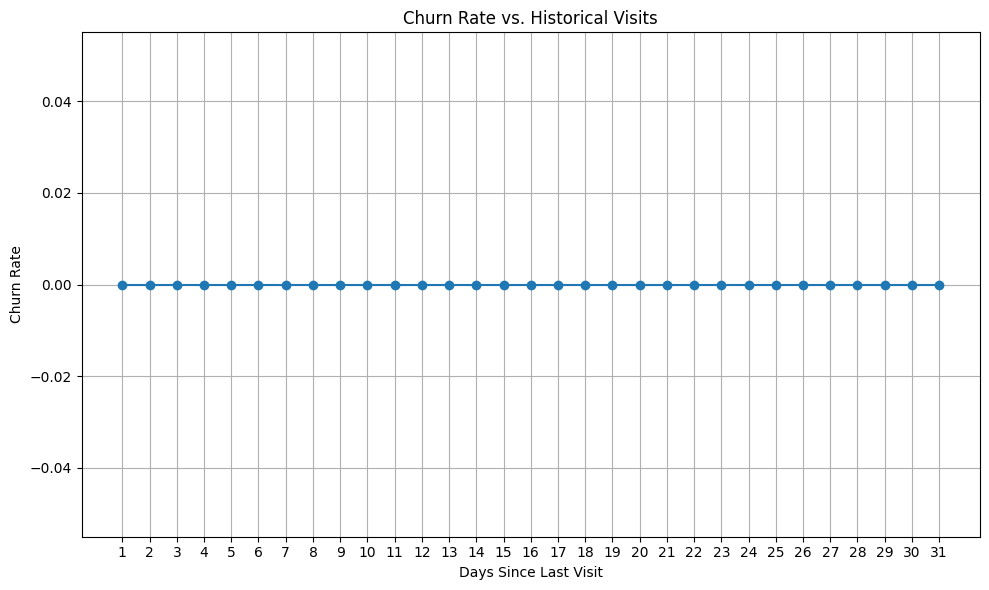

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_data contains columns 'Churned' and 'Days_Since_Last_Visit'
# Calculate churn rate for each historical visit
churn_rate_by_visits = combined_data.groupby('Days_Since_Last_Visit')['label'].mean()

# Plot churn rate against historical visits
plt.figure(figsize=(10, 6))
plt.plot(churn_rate_by_visits.index, churn_rate_by_visits.values, marker='o', linestyle='-')
plt.title('Churn Rate vs. Historical Visits')
plt.xlabel('Days Since Last Visit')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.xticks(churn_rate_by_visits.index)
plt.tight_layout()
plt.show()

